In [34]:
from scipy.io import arff
import pandas as pd
import pandas_profiling as pp
import pandas.util.testing as tm
import numpy as np

In [35]:
#Loading data
data = arff.loadarff('/home/indtusuario/ML Projects/Defect Prediction/jm1.arff')
df = pd.DataFrame(data[0])
#converting values to bytes 0 and 1
df['defects'] = df['defects'].str.decode("utf-8").apply(lambda x: 0 if(x == 'false') else 1)

df.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2.0,2.0,2.0,2.0,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51.0,10.0,8.0,1.0,17.0,36.0,112.0,86.0,13.0,1
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129.0,29.0,28.0,2.0,17.0,135.0,329.0,271.0,5.0,1
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0,1


In [36]:
#verifying null attributes
df.isnull().values.any()

True

In [37]:
#verifying constant values
df.columns[df.nunique() <= 1]

Index([], dtype='object')

In [38]:
#verifying duplicated values
def is_unique(s):
    a = s.to_numpy()
    return (a[0] == a[1:]).all()

is_unique(df)

False

In [39]:
#verifying integrity
count = 0
for index, row in df.iterrows():
  if (row['n'] != row['total_Opnd'] + row['total_Op']):
    count += 1
    df.drop(index, inplace=True)
print(count)

146


In [40]:
#removing duplicated values
df.drop_duplicates( keep='first', inplace=True)
#correlation analyses
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
loc,1.000000,0.806387,0.508581,0.771014,0.871823,0.892941,-0.297024,0.677949,0.466474,0.752257,0.892947,0.752257,0.913156,0.609697,0.787881,0.262366,0.512108,0.743823,0.870837,0.858706,0.819054,0.225272
v(g),0.806387,1.000000,0.695584,0.851179,0.714466,0.747676,-0.266364,0.655975,0.265994,0.705987,0.747700,0.705987,0.787180,0.367063,0.509848,0.189159,0.640407,0.686149,0.728034,0.681965,0.969445,0.188695
ev(g),0.508581,0.695584,1.000000,0.641903,0.453383,0.436591,-0.253269,0.411288,0.182079,0.312024,0.436575,0.312024,0.442438,0.279835,0.319599,0.176024,0.226468,0.311367,0.469116,0.421983,0.786962,0.155278
iv(g),0.771014,0.851179,0.641903,1.000000,0.687909,0.730491,-0.205260,0.564147,0.281615,0.751981,0.730548,0.751981,0.761444,0.335792,0.515543,0.190452,0.485280,0.598694,0.700395,0.657490,0.852015,0.165394
n,0.871823,0.714466,0.453383,0.687909,1.000000,0.984006,-0.242687,0.805209,0.631349,0.716478,0.983995,0.716478,0.941951,0.595382,0.785019,0.269719,0.592061,0.822243,0.995600,0.989900,0.731826,0.181237
v,0.892941,0.747676,0.436591,0.730491,0.984006,1.000000,-0.203987,0.752703,0.581445,0.800526,0.999992,0.800526,0.960788,0.576451,0.780307,0.252517,0.599712,0.844463,0.980693,0.972529,0.747047,0.170771
l,-0.297024,-0.266364,-0.253269,-0.205260,-0.242687,-0.203987,1.000000,-0.344406,-0.075063,-0.068567,-0.203950,-0.068567,-0.217316,-0.165007,-0.205133,-0.103883,-0.256664,-0.199461,-0.240573,-0.241818,-0.295818,-0.127126
d,0.677949,0.655975,0.411288,0.564147,0.805209,0.752703,-0.344406,1.000000,0.351219,0.585539,0.752687,0.585539,0.769784,0.499161,0.622410,0.236635,0.726977,0.617028,0.816046,0.775321,0.656090,0.133981
i,0.466474,0.265994,0.182079,0.281615,0.631349,0.581445,-0.075063,0.351219,1.000000,0.196572,0.581404,0.196572,0.541401,0.373343,0.543424,0.202893,0.334661,0.703018,0.599943,0.668284,0.286546,0.161348
e,0.752257,0.705987,0.312024,0.751981,0.716478,0.800526,-0.068567,0.585539,0.196572,1.000000,0.800577,1.000000,0.813977,0.381180,0.598682,0.136686,0.492279,0.584734,0.735301,0.675993,0.664175,0.078489


In [41]:
#normalizaion
msk = np.random.rand(len(df)) < 0.8
x_train = df[msk]
x_test = df[~msk]

y_train = x_train['defects']
x_train.drop('defects', axis=1,inplace=True)

y_test = x_test['defects']
x_test.drop('defects', axis=1,inplace=True)
x_train

/home/indtusuario/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,572.07,28.0,1.0,6.0,0.0,11.0,16.0,76.0,50.0,7.0
5,31.0,2.0,1.0,2.0,111.0,582.52,0.08,12.25,47.55,7135.87,...,396.44,19.0,0.0,5.0,0.0,14.0,24.0,69.0,42.0,3.0
6,78.0,9.0,5.0,4.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.0
7,8.0,1.0,1.0,1.0,16.0,50.72,0.36,2.80,18.11,142.01,...,7.89,5.0,0.0,1.0,0.0,4.0,5.0,9.0,7.0,1.0
9,143.0,22.0,20.0,10.0,0.0,0.00,0.00,0.00,0.00,0.00,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10879,24.0,2.0,1.0,2.0,95.0,470.65,0.08,12.10,38.90,5694.85,...,316.38,18.0,0.0,4.0,0.0,11.0,20.0,51.0,44.0,3.0
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,98.38,13.0,0.0,2.0,0.0,10.0,15.0,30.0,22.0,7.0
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,59.43,5.0,0.0,2.0,0.0,12.0,8.0,19.0,11.0,3.0
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,68.98,6.0,0.0,2.0,0.0,9.0,8.0,21.0,15.0,1.0


In [42]:
#preparing data for cross validation
y_tr = df['defects']
x_tr = df
x_tr.drop('defects', axis=1,inplace=True)

In [43]:
# standardization of data with StandardScaler
from sklearn.preprocessing import StandardScaler

attr_num = df.dtypes[df.dtypes != "object"].index

standardscaler = StandardScaler()
standardscaler = standardscaler.fit(df[attr_num])
normalizadas_train = standardscaler.transform(df[attr_num])

normalizadas_train = pd.DataFrame(normalizadas_train)
normalizadas_train.columns = df[attr_num].columns
normalizadas_train.index = df[attr_num].index
x_tr = normalizadas_train

In [44]:
!pip install scikit-plot
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn import svm

In [45]:
#cross validation function
def cross_validation(model, X, Y, kfold):
    acc = cross_val_score(model, X, Y, cv=kfold)
    prec = cross_val_score(model, X, Y, scoring='precision_macro', cv=kfold)
    rec = cross_val_score(model, X, Y, scoring='recall_macro', cv=kfold)
    f1 = cross_val_score(model, X, Y, scoring='f1_macro', cv=kfold)
    y_pred = cross_val_predict(model, X, Y, cv=kfold)
    conf_mat = confusion_matrix(Y, y_pred).ravel()
    print("Média: \n")
    print("Accuracy: %.2f%% (%.2f%%)" % (acc.mean() * 100, acc.std() * 100))
    print("Precision: %.2f%% (%.2f%%)" % (prec.mean() * 100, prec.std() * 100))
    print("PD: %.2f%% " % ((conf_mat[0] * 100)/sum(conf_mat)))
    print("PF: %.2f%% " % ((conf_mat[2] * 100)/sum(conf_mat)))


In [46]:
# model measure
def model_measure(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print('Accuracy: %f' % (accuracy *100))
  precision = precision_score(y_test, y_pred,average='macro')
  print('Precision: %f' % (precision *100))
  conf_mat = confusion_matrix(y_test, y_pred).ravel()
  print("PD: %.2f%% " % ((conf_mat[0] * 100)/sum(conf_mat)))
  print("PF: %.2f%% " % ((conf_mat[2] * 100)/sum(conf_mat)))


In [47]:
# plot roc curve
import sklearn.metrics as metrics
def plot_roc(y_test,probs):
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)

  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

In [48]:
kfold  = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)

Accuracy: 77.721943
Precision: 67.102692
PD: 74.76% 
PF: 19.88% 


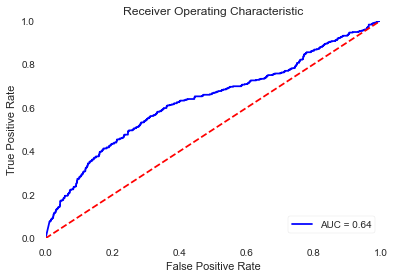

In [49]:
# Gaussian Naive Bayes model
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_measure(y_test,y_pred )
probs = model.predict_proba(x_test)
plot_roc(y_test,probs)

In [50]:
# Gaussian Naive Bayes model cross validation
naiveb = GaussianNB() 
naiveb.fit(x_tr, y_tr)
cross_validation(GaussianNB() , x_tr, y_tr , kfold)

Média: 

Accuracy: 77.50% (0.50%)
Precision: 64.54% (1.71%)
PD: 73.32% 
PF: 18.15% 


/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 78.615299
Precision: 74.928637
PD: 76.16% 
PF: 20.38% 


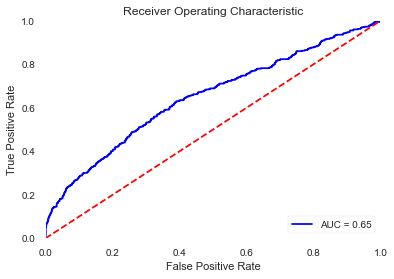

In [51]:
# Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_measure(y_test,y_pred )

probs = model.predict_proba(x_test)
plot_roc(y_test,probs)

In [52]:
# Logistic Regression cross validation 
model = LogisticRegression(max_iter=1000)
grid={"C":np.logspace(0, 4, 10), "penalty":["l2"]}
regressao = GridSearchCV(LogisticRegression("l2", max_iter=1000) , grid , cv=kfold, scoring=make_scorer(f1_score, average='macro'))
regressao.fit(x_tr, y_tr)
cross_validation(LogisticRegression(max_iter=1000) , x_tr, y_tr , kfold)

/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver 

Média: 

Accuracy: 78.39% (0.54%)
Precision: 68.81% (3.20%)
PD: 75.84% 
PF: 19.78% 


/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 68.118370
Precision: 54.872586
PD: 61.14% 
PF: 15.86% 


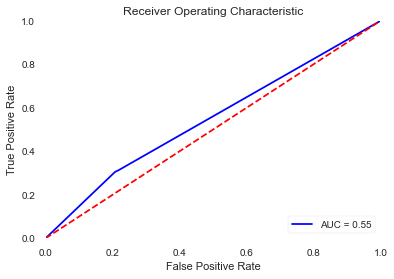

In [53]:
# Decision Tree model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_measure(y_test,y_pred )

probs = model.predict_proba(x_test)
plot_roc(y_test,probs)

In [54]:
# Decision Tree cross validation
parametro = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20,25,30,40,50,70,90,120,150] , 'criterion':['gini','entropy']}
arvore = GridSearchCV(DecisionTreeClassifier(), parametro, cv=kfold, scoring='accuracy')
arvore.fit(x_tr, y_tr)
cross_validation(DecisionTreeClassifier(max_depth = arvore.best_params_.get("max_depth")), x_tr, y_tr, kfold)

Média: 

Accuracy: 77.82% (0.18%)
Precision: 65.20% (1.34%)
PD: 74.93% 
PF: 19.44% 


Accuracy: 69.235064
Precision: 56.575437
PD: 61.59% 
PF: 15.19% 


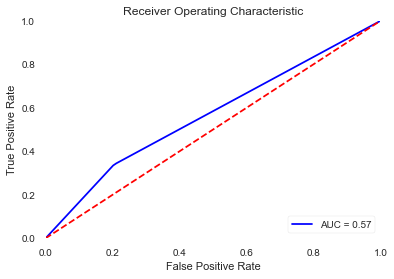

In [55]:
# SVM model
clf = svm.SVC(kernel='linear')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_measure(y_test,y_pred )

probs = model.predict_proba(x_test)
plot_roc(y_test,probs)

In [57]:
# SVM cross validation
support = svm.SVC(kernel='linear')
support.fit(x_tr, y_tr)
cross_validation(svm.SVC(kernel='linear'), x_tr, y_tr, kfold)

Média: 

Accuracy: 77.83% (0.12%)
Precision: 73.72% (6.76%)
PD: 77.52% 
PF: 22.02% 


Accuracy: 73.366834
Precision: 55.511484
PD: 69.79% 
PF: 19.26% 


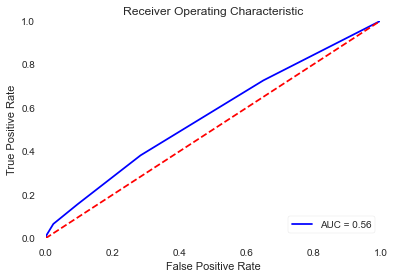

In [59]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_measure(y_test,y_pred )
probs = model.predict_proba(x_test)
plot_roc(y_test,probs)

In [60]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
# instantiate the grid
gridKNN = GridSearchCV(knn, param_grid, cv=kfold,scoring=make_scorer(f1_score, average='macro'))
gridKNN.fit(x_tr,y_tr)
cross_validation(gridKNN, x_tr, y_tr , kfold)

Média: 

Accuracy: 59.12% (0.56%)
Precision: 61.41% (1.04%)
PD: 68.86% 
PF: 16.06% 


Iteration 1, loss = inf
Iteration 2, loss = 6.73985105
Iteration 3, loss = 6.78613295
Iteration 4, loss = 6.76961546
Iteration 5, loss = 6.75325499
Iteration 6, loss = 6.73982026
Iteration 7, loss = 6.72677117
Iteration 8, loss = 6.71720471
Iteration 9, loss = 6.71088417
Iteration 10, loss = 6.70259350
Iteration 11, loss = 6.69683179
Iteration 12, loss = 6.69248295
Iteration 13, loss = 6.68800424
Iteration 14, loss = 6.68400944
Iteration 15, loss = 6.68083464
Iteration 16, loss = 6.67889684
Iteration 17, loss = 6.67422194
Iteration 18, loss = 6.67242000
Iteration 19, loss = 6.67052974
Iteration 20, loss = 6.66964987
Iteration 21, loss = 6.66708951
Iteration 22, loss = 6.66678630
Iteration 23, loss = 6.66465174
Iteration 24, loss = 6.66349213
Iteration 25, loss = 6.66283271
Iteration 26, loss = 6.66274842
Iteration 27, loss = 6.66165567
Iteration 28, loss = 6.66104823
Iteration 29, loss = 6.65981755
Iteration 30, loss = 6.66104851
Iteration 31, loss = 6.65883289
Iteration 32, loss = 6.6

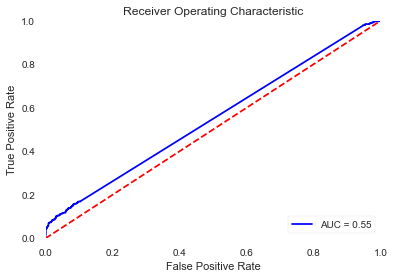

In [64]:
model = MLPClassifier(max_iter=300, alpha=0.0001,
                     solver='sgd', verbose=15,  random_state=21)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_measure(y_test,y_pred )

probs = model.predict_proba(x_test)
plot_roc(y_test,probs)

In [65]:
parameters = {'solver': ['sgd'], 'max_iter': [800], 
              'alpha': [0.0001], 'random_state':[21]}
rede = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1)
rede.fit(x_tr, y_tr)
cross_validation(rede, x_tr, y_tr , kfold)

/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/indtusuario/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to s

Média: 

Accuracy: 78.52% (0.59%)
Precision: 70.16% (4.01%)
PD: 76.18% 
PF: 20.00% 


Accuracy: 78.503629
Precision: 74.727401
PD: 76.21% 
PF: 20.55% 


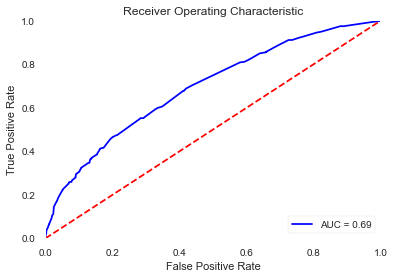

In [66]:
model = AdaBoostClassifier(algorithm="SAMME",n_estimators=300)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
model_measure(y_test,y_pred )
probs = model.predict_proba(x_test)
plot_roc(y_test,probs)

In [67]:
model = AdaBoostClassifier(algorithm="SAMME", n_estimators=300)
model.fit(x_tr, y_tr)
cross_validation(AdaBoostClassifier(algorithm="SAMME", n_estimators=300) , x_tr, y_tr , kfold)

Média: 

Accuracy: 78.45% (0.27%)
Precision: 69.47% (1.80%)
PD: 75.88% 
PF: 19.77% 
